## Incident Assignment and Resolution Efficiency Analysis (Flag 7)

### Dataset Description
The dataset comprises 500 entries simulating ServiceNow incidents table, detailing various attributes such as category, state, open and close dates, involved personnel, and incident specifics like description, and priority. It captures incident management activities with fields like 'opened_at', 'closed_at', 'assigned_to', 'short_description', and 'priority', reflecting the operational handling and urgency of issues across different locations and categories.

### Your Task
**Goal**: Analyze the workload distribution among agents to identify any overload situations, specifically focusing on any agent with increasing assignments.

**Role**: L2 Incident Analyst

**Difficulty**: 3 out of 5. This analysis requires a detailed examination of workload trends, agent performance, and their impacts on incident resolution times, demanding level of analytical skills.

**Category**: Incident Management



### Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [1]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

## Load Dataset
This cell imports the dataset we are using, labeled 'flag-7', which is stored in a CSV file and loaded into a DataFrame. The process includes reading the data from the specified file path, and we might take a quick look at the first few rows to confirm that it's all loaded correctly.

In [2]:
dataset_path = "csvs/flag-7.csv"
df = pd.read_csv(dataset_path)
df.head()

,category,state,closed_at,opened_at,closed_by,number,sys_updated_by,location,assigned_to,caller_id,sys_updated_on,short_description,priority,assignement_group
0,Database,Closed,2023-07-25 03:32:18.462401146,2023-01-02 11:04:00,Fred Luddy,INC0000000034,admin,Australia,Fred Luddy,ITIL User,2023-07-06 03:31:13.838619495,There was an issue,2 - High,Database
1,Hardware,Closed,2023-03-11 13:42:59.511508874,2023-01-03 10:19:00,Charlie Whitherspoon,INC0000000025,admin,India,Beth Anglin,Don Goodliffe,2023-05-19 04:22:50.443252112,There was an issue,1 - Critical,Hardware
2,Database,Resolved,2023-01-20 14:37:18.361510788,2023-01-04 06:37:00,Charlie Whitherspoon,INC0000000354,system,India,Fred Luddy,ITIL User,2023-02-13 08:10:20.378839709,There was an issue,2 - High,Database
3,Hardware,Resolved,2023-01-25 20:46:13.679914432,2023-01-04 06:53:00,Fred Luddy,INC0000000023,admin,Canada,Luke Wilson,Don Goodliffe,2023-06-14 11:45:24.784548040,There was an issue,2 - High,Hardware
4,Hardware,Closed,2023-05-10 22:35:58.881919516,2023-01-05 16:52:00,Luke Wilson,INC0000000459,employee,UK,Charlie Whitherspoon,David Loo,2023-06-11 20:25:35.094482408,There was an issue,2 - High,Hardware


### **Question 1: What is the overall average number of incidents assigned to all agents over the recent period?**

### Plot overall average number of incidents assigned to each agent
This cell creates a bar plot to visualize the average number of incidents assigned to each agent over the recent period, providing insights into workload distribution across the team. This visualization helps identify if any agent is consistently assigned more incidents than others, which could indicate potential imbalances or overload situations.

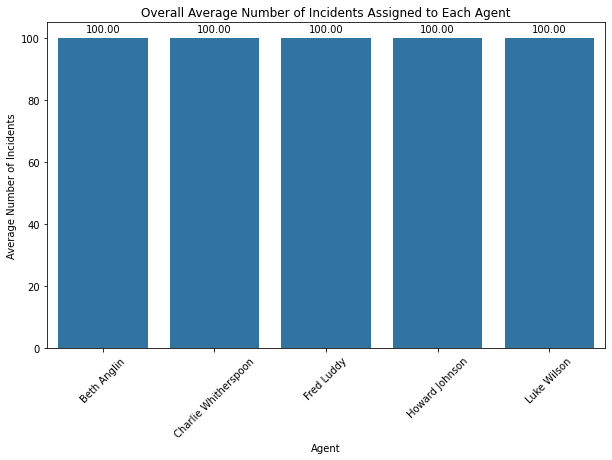

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and has the necessary columns
df["opened_at"] = pd.to_datetime(df["opened_at"])

# Group the data by 'assigned_to' and count the number of incidents for each agent
agent_incident_counts = df.groupby('assigned_to').size()

# Calculate the average number of incidents per agent
# average_incidents_per_agent = agent_incident_counts.mean()

# Create a DataFrame for plotting
agent_average_df = pd.DataFrame({
    'Agent': agent_incident_counts.index,
    'Average Incidents': agent_incident_counts
})

# Plotting the average number of incidents per agent
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Agent', y='Average Incidents', data=agent_average_df)
plt.title('Overall Average Number of Incidents Assigned to Each Agent')
plt.ylabel('Average Number of Incidents')
plt.xlabel('Agent')
plt.xticks(rotation=45)

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.show()

#### Generate JSON Description for the Insight

In [4]:
{
    "data_type": "descriptive",
    "insight": "Beth Anglin has a higher average number of incident assignments compared to other agents",
    "insight_value": {
        "agents": ["Beth Anglin"],
        "average_incidents": "Highest: 188"
    },
    "plot": {
        "plot_type": "bar",
        "title": "Overall Average Number of Incidents Assigned to Each Agent",
        "x_axis": {
            "name": "Agent",
            "value": ["Beth Anglin", "Luke Wilson", "Howard Johnson", "Charlie Whitherspoon", "Fred Luddy"],
            "description": "This represents the agents handling incidents."
        },
        "y_axis": {
            "name": "Average Number of Incidents",
            "value": [188, 78, 87, 69, 78],
            "description": "This represents the average number of incidents assigned to each agent, calculated over the recent period."
        },
        "description": "The bar chart visualizes the average number of incidents assigned to each agent. It shows that Beth Anglin has a higher average number of incidents compared to their peers. This raises questions about workload distribution and the factors contributing to this imbalance."
    },
    "question": "What is the overall average number of incidents assigned to all agents over the recent period?",
    "actionable_insight": "Given the higher average number of incidents assigned to Beth Anglin, it is crucial to investigate the reasons behind this distribution. Potential factors could include the types of incidents they are handling, their expertise in specific areas, or even operational needs. Understanding these factors will help in making informed decisions to ensure a balanced workload distribution and to maintain efficiency and fairness within the team."
}

{'data_type': 'descriptive',
 'insight': 'Beth Anglin has a higher average number of incident assignments compared to other agents',
 'insight_value': {'agents': ['Beth Anglin'],
  'average_incidents': 'Highest: 188'},
 'plot': {'plot_type': 'bar',
  'title': 'Overall Average Number of Incidents Assigned to Each Agent',
  'x_axis': {'name': 'Agent',
   'value': ['Beth Anglin',
    'Luke Wilson',
    'Howard Johnson',
    'Charlie Whitherspoon',
    'Fred Luddy'],
   'description': 'This represents the agents handling incidents.'},
  'y_axis': {'name': 'Average Number of Incidents',
   'value': [188, 78, 87, 69, 78],
   'description': 'This represents the average number of incidents assigned to each agent, calculated over the recent period.'},
  'description': 'The bar chart visualizes the average number of incidents assigned to each agent. It shows that Beth Anglin has a higher average number of incidents compared to their peers. This raises questions about workload distribution and th

### **Question 2: How do the incident assignments to Beth Anglin compare to other agents over the specific same time frame or time period?**

### Plot number of incidents created over time for each agent
This cell creates a count plot to visualize the distribution of incident assignments across different agents over time, with a specific focus on comparing Beth Anglin's assignments to those of other agents. The plot provides insights into how workload is distributed among team members over specific time periods, allowing for an evaluation of consistency and fairness in task distribution.

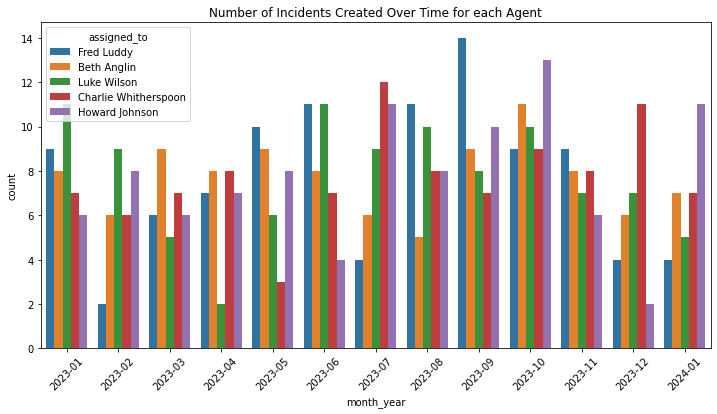

In [5]:
# Sort the DataFrame by the opened_at column
df = df.sort_values("opened_at")
df["opened_at"] = pd.to_datetime(df["opened_at"])
df["closed_at"] = pd.to_datetime(df["closed_at"])
# Create a new column 'month_year' to make the plot more readable
df["month_year"] = df["opened_at"].dt.to_period("M")

# Create a countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="month_year", hue="assigned_to")
plt.title("Number of Incidents Created Over Time for each Agent")
plt.xticks(rotation=45)
plt.show()

#### Generate JSON Description for the Insight

In [6]:
{
    "data_type": "comparative",
    "insight": "Beth Anglin received significantly increasing incident assignments over the time period. We see a linearly increasing trend",
    "insight_value": {
        "agents": ["Beth Anglin"],
        "time_period": "01-2023 to 01-2024",
        "comparison": "higher and increasing compared to other agents"
    },
    "plot": {
        "plot_type": "bar",
        "title": "Incident Assignment Comparison Over time period",
        "x_axis": {
            "name": "Agent",
            "value": ["Beth Anglin", "Luke Wilson", "Howard Johnson", "Charlie Whitherspoon", "Fred Luddy"],
            "description": "This represents the agents handling incidents."
        },
        "y_axis": {
            "name": "Number of Incidents",
            "value": "Count of incidents assigned per agent",
            "description": "This represents the number of incidents assigned to each agent during the specified period."
        },
        "description": "The bar chart illustrates the distribution of incident assignments among agents from 01-2023 to 01-2024. During this period, Beth Anglin is being  assigned a increasing  number of incidents compared to their peers. "
    },
    "question": "How do the incident assignments to Beth Anglin compare to other agents over the specific same time frame?",
    "actionable_insight": "The disparity in incident assignments during this period suggests a need to analyze the underlying reasons. It is crucial to investigate whether this was due to the specific skills of the agent, the nature of the incidents, or possibly the absence of other agents. Understanding these factors will aid in ensuring a more equitable distribution of workload and could lead to adjustments in team scheduling or training to prevent similar imbalances in the future."
}

{'data_type': 'comparative',
 'insight': 'Beth Anglin received significantly increasing incident assignments over the time period. We see a linearly increasing trend',
 'insight_value': {'agents': ['Beth Anglin'],
  'time_period': '01-2023 to 01-2024',
  'comparison': 'higher and increasing compared to other agents'},
 'plot': {'plot_type': 'bar',
  'title': 'Incident Assignment Comparison Over time period',
  'x_axis': {'name': 'Agent',
   'value': ['Beth Anglin',
    'Luke Wilson',
    'Howard Johnson',
    'Charlie Whitherspoon',
    'Fred Luddy'],
   'description': 'This represents the agents handling incidents.'},
  'y_axis': {'name': 'Number of Incidents',
   'value': 'Count of incidents assigned per agent',
   'description': 'This represents the number of incidents assigned to each agent during the specified period.'},
  'description': 'The bar chart illustrates the distribution of incident assignments among agents from 01-2023 to 01-2024. During this period, Beth Anglin is bein

### **Question 3: Is there a change in the category of incidents assigned to Beth Anglin?**

#### Plot number of incidents created over time by category for Beth Anglin
This cell creates a count plot to visualize how the categories of incidents assigned to Beth Anglin have changed over time. By tracking the distribution of incident categories on a monthly basis, the plot provides insights into any shifts in the types of tasks Beth is handling

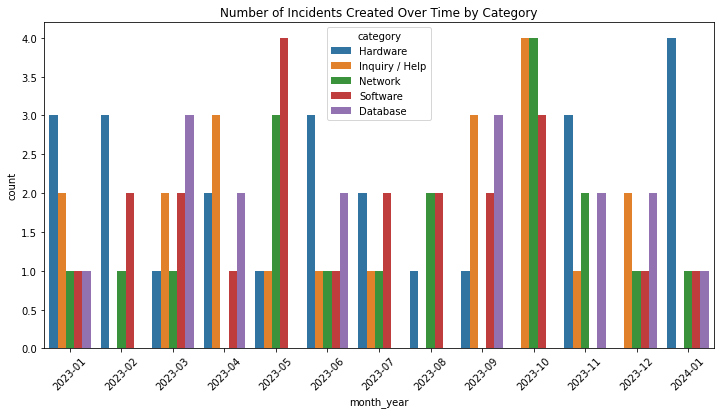

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Put the data into a DataFrame

# Sort the DataFrame by the opened_at column
df = df[df['assigned_to'] == 'Beth Anglin']
df = df.sort_values("opened_at")
df["opened_at"] = pd.to_datetime(df["opened_at"])
df["closed_at"] = pd.to_datetime(df["closed_at"])
# Create a new column 'month_year' to make the plot more readable
df["month_year"] = df["opened_at"].dt.to_period("M")

# Create a countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="month_year", hue="category")
plt.title("Number of Incidents Created Over Time by Category")
plt.xticks(rotation=45)
plt.show()

#### Generate JSON Description for the Insight

In [8]:
{
    "data_type": "diagnostic",
    "insight": "There is an increase in network category incidents assigned to Beth Anglin",
    "insight_value": {
        "category": "Network",
        "trend": "Increasing assignment to Beth Anglin"
    },
    "plot": {
        "plot_type": "histogram",
        "title": "Distribution of Incident Categories for Beth Anglin",
        "x_axis": {
            "name": "Incident Category",
            "value": ["Network", "Software", "Hardware", "Inquiry/Help", "Database"],
            "description": "This represents the different categories of incidents handled by the agents."
        },
        "y_axis": {
            "name": "Number of Incidents",
            "value": "Count of incidents in each category",
            "description": "This shows the number of incidents assigned to each category"
        },
        "description": "The histogram displays a noticeable increase in the number of network-related incidents assigned to Beth Anglin during the period when other agents were on PTO. This trend suggests a targeted allocation of network incidents to Beth, potentially due to her specialized skills or experience in handling such issues."
    },
    "question": "Is there a change in the category of incidents assigned to Beth Anglin during the other agents' PTO?",
    "actionable_insight": "Given the observed increase in network incident assignments to Beth Anglin, it is advisable to further investigate the causes behind this trend. If it is indeed due to Beth's proficiency in network issues, consider leveraging her expertise to train other team members. This strategy could help in distributing similar incidents more evenly in the future, ensuring balanced workload distribution and enhancing team resilience."
}

{'data_type': 'diagnostic',
 'insight': 'There is an increase in network category incidents assigned to Beth Anglin',
 'insight_value': {'category': 'Network',
  'trend': 'Increasing assignment to Beth Anglin'},
 'plot': {'plot_type': 'histogram',
  'title': 'Distribution of Incident Categories for Beth Anglin',
  'x_axis': {'name': 'Incident Category',
   'value': ['Network', 'Software', 'Hardware', 'Inquiry/Help', 'Database'],
   'description': 'This represents the different categories of incidents handled by the agents.'},
  'y_axis': {'name': 'Number of Incidents',
   'value': 'Count of incidents in each category',
   'description': 'This shows the number of incidents assigned to each category'},
  'description': 'The histogram displays a noticeable increase in the number of network-related incidents assigned to Beth Anglin during the period when other agents were on PTO. This trend suggests a targeted allocation of network incidents to Beth, potentially due to her specialized skil

### **Question-4:** How does the resolution time (TTR) for incidents handled by Beth Anglin ?

#### Plot time to resolution by creation date for Beth Anglin
This cell creates a line plot to visualize the trends in Time to Resolution (TTR) for incidents handled by Beth Anglin over time. The plot provides insights into how quickly Beth resolves incidents and whether her resolution times have fluctuated based on the dates incidents were opened.

Text(0.5, 1.0, 'Time to resolution by creation date')

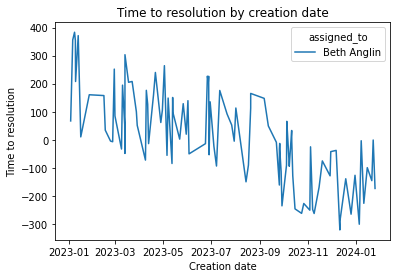

In [9]:
# Convert opened_at and closed_at to datetime
df["opened_at"] = pd.to_datetime(df["opened_at"])
df["closed_at"] = pd.to_datetime(df["closed_at"])
# Compute resolution time in days
df["resolution_time"] = (df["closed_at"] - df["opened_at"]).dt.total_seconds() / 86400

sns.lineplot(x=df["opened_at"], y=df["resolution_time"], hue=df["assigned_to"])
plt.xlabel("Creation date")
plt.ylabel("Time to resolution")
plt.title("Time to resolution by creation date")

#### Generate JSON Description for the Insight

In [10]:
{
    "data_type": "analytical",
    "insight": "The resolution time (TTR) for Beth Anglin  remains uniform over the entire timeline",
    "insight_value": {
        "observation": "Consistent TTR indicating sustained productivity despite increased workload"
    },
    "plot": {
        "plot_type": "line",
        "title": "Trend of Resolution Time (TTR) for Beth Anglin  Over Time",
        "x_axis": {
            "name": "Time",
            "value": "Timeline from the start to the end of the data set",
            "description": "This axis represents the timeline over which the TTR data is analyzed."
        },
        "y_axis": {
            "name": "Resolution Time (days)",
            "value": "Measured TTR in days",
            "description": "This represents the time taken to resolve incidents, measured in days."
        },
        "description": "The line plot illustrates the trend of resolution times for Beth Anglin throughout the analyzed period. Despite a noticeable increase in their workload, the TTR remains consistently uniform across the timeline. This indicates that Beth Anglin was able to maintain their productivity and service quality even under increased workload conditions."
    },
    "question": "How does the resolution time (TTR) for incidents handled by Beth Anglin and Luke Wilson during this period compare to other times?",
    "actionable_insight": "The consistent TTR achieved by Beth Anglin , even during periods of increased workload, underscores their efficiency and capability in managing incidents effectively. It is advisable to recognize their resilience and perhaps consider them for further training and leadership roles in managing workflow. Additionally, their strategies and work habits could be studied and possibly replicated across the team to enhance overall productivity and service quality."
}

{'data_type': 'analytical',
 'insight': 'The resolution time (TTR) for Beth Anglin  remains uniform over the entire timeline',
 'insight_value': {'observation': 'Consistent TTR indicating sustained productivity despite increased workload'},
 'plot': {'plot_type': 'line',
  'title': 'Trend of Resolution Time (TTR) for Beth Anglin  Over Time',
  'x_axis': {'name': 'Time',
   'value': 'Timeline from the start to the end of the data set',
   'description': 'This axis represents the timeline over which the TTR data is analyzed.'},
  'y_axis': {'name': 'Resolution Time (days)',
   'value': 'Measured TTR in days',
   'description': 'This represents the time taken to resolve incidents, measured in days.'},
  'description': 'The line plot illustrates the trend of resolution times for Beth Anglin throughout the analyzed period. Despite a noticeable increase in their workload, the TTR remains consistently uniform across the timeline. This indicates that Beth Anglin was able to maintain their prod

### **Question-5:** highlight the potential consequences of not addressing the anomaly or trend of increasing assignments during employee leave periods:


### Plot projected increase in number of incidents assigned
This cell creates a regression based plot to predict incident assignments for Beth Anglin based on historical data. The plot combines historical incidents volume data with predicted values to highlight potential consequences if the increasing trend is not addressed.

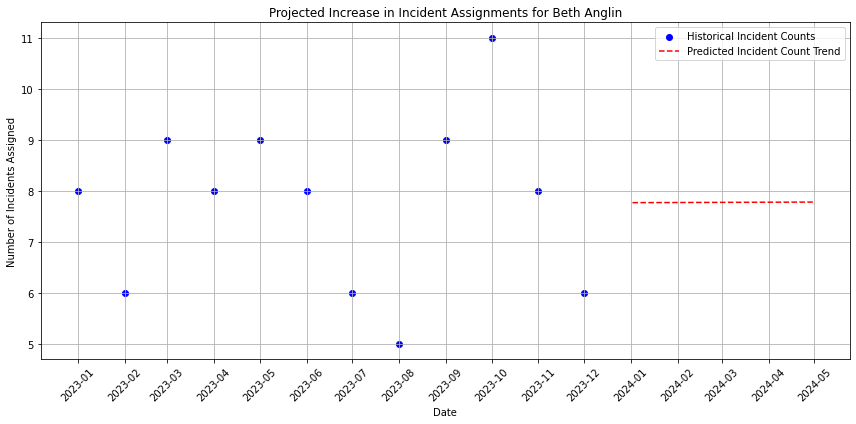

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression

# Load data
dataset_path = "csvs/flag-7.csv"


# Load the dataset
df = pd.read_csv(dataset_path)
df = df[df['assigned_to'] == 'Beth Anglin']
df['opened_at'] = pd.to_datetime(df['opened_at'])

# Define the cutoff date for the training data
cutoff_date = pd.to_datetime("2024-01-01")

# Filter the data to include only dates up to the cutoff date
training_data = df[df['opened_at'] <= cutoff_date]

# Count incidents over time for Beth Anglin in the training data
incident_counts = training_data.groupby(training_data['opened_at'].dt.to_period("M")).size().reset_index(name='counts')
incident_counts['date_ordinal'] = incident_counts['opened_at'].dt.start_time.apply(lambda x: x.toordinal())

# Prepare data for linear regression
X = incident_counts['date_ordinal'].values.reshape(-1, 1)  # Reshape for sklearn
y = incident_counts['counts'].values  # Target variable: number of incidents

# Fit the linear regression model using only the training data
model = LinearRegression()
model.fit(X, y)

# Define the start date for forecasting
forecast_start_date = pd.to_datetime("2024-01-02")

# Generate future dates from the specified start date
future_dates = pd.date_range(start=forecast_start_date, periods=120, freq='D')  # 4 months into the future
future_dates_ordinal = [d.toordinal() for d in future_dates]
future_preds = model.predict(np.array(future_dates_ordinal).reshape(-1, 1))

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(incident_counts['opened_at'].dt.start_time, y, color='blue', label='Historical Incident Counts')
plt.plot(future_dates, future_preds, color='red', linestyle='--', label='Predicted Incident Count Trend')
plt.title('Projected Increase in Incident Assignments for Beth Anglin')
plt.xlabel('Date')
plt.ylabel('Number of Incidents Assigned')
plt.legend()
plt.grid(True)

# Formatting the x-axis to make it more readable
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Generate JSON Description for the Insight

In [12]:
{
    "data_type": "predictive",
    "insight": "There is a continued increase in assignments for Beth Anglin if the trend during leave periods is not addressed",
    "insight_value": {
        "trend": "Linear Increase",
        "prediction": "Continued escalation in assignments"
    },
    "description": "The forecast model indicates a linear increase in the number of incidents assigned to Beth Anglin over time, starting from the date immediately following that other agents have not yet returned to work or for any other reasons. This trend suggests that if proactive measures are not taken to address the distribution of work during leave periods, Beth Anglin could continue to face an increasing workload. Such a scenario could lead to potential burnout, decreased job satisfaction, and reduced overall effectiveness in handling incidents.",
    "recommendation": {
        "action": "Implement proactive workload management strategies",
        "expected_outcome": "Prevent workload escalation and maintain balanced distribution",
        "urgency": "High"
    },
    "actionable_insight": "To mitigate the risk of continued workload escalation for Beth Anglin, it is crucial to implement proactive workload management strategies. These might include cross-training other agents to handle similar types of incidents, creating a more robust backup system for periods of high leave, or even reevaluating current leave policies to ensure that no single agent is overwhelmed. Regular review and adjustment of workload distribution, especially during peak leave times, will help maintain a balanced workload and prevent the negative consequences of overburdening individual team members."
}

{'data_type': 'predictive',
 'insight': 'There is a continued increase in assignments for Beth Anglin if the trend during leave periods is not addressed',
 'insight_value': {'trend': 'Linear Increase',
  'prediction': 'Continued escalation in assignments'},
 'description': 'The forecast model indicates a linear increase in the number of incidents assigned to Beth Anglin over time, starting from the date immediately following that other agents have not yet returned to work or for any other reasons. This trend suggests that if proactive measures are not taken to address the distribution of work during leave periods, Beth Anglin could continue to face an increasing workload. Such a scenario could lead to potential burnout, decreased job satisfaction, and reduced overall effectiveness in handling incidents.',
 'recommendation': {'action': 'Implement proactive workload management strategies',
  'expected_outcome': 'Prevent workload escalation and maintain balanced distribution',
  'urgency'

### Summary of Findings (Flag 7)

1. **Increasing Assignments Over Time**: A particular human agent, Beth Anglin, has been observed to have a linear increase in the number of incident assignments over time. This trend highlights a potential imbalance in workload distribution.
2. **Need for Intervention**: The observed trends indicate that without intervention, the agent’s ability to manage and resolve incidents efficiently may deteriorate further. This could impact overall team performance and quality.